In [1]:
import numpy as np
import pandas as pd
from pgmpy.estimators import ParameterEstimator, BicScore
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt
import GA_lib as GA
from scipy.stats import multinomial


In [2]:
data=pd.read_csv("ASIA_DATA.csv")
dag_true=pd.read_csv("DAGtrue_ASIA.csv")

In [3]:
dag_true
data.columns

Index(['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'], dtype='object')

In [4]:


# Read the CSV file into a DataFrame
df = dag_true
# Define the desired topological order
topological_order = ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']

# Create a list of unique variables (nodes)
nodes = np.unique(df[['Variable 1', 'Variable 2']].values)

# Initialize an empty adjacency matrix filled with zeros
num_nodes = len(nodes)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

# Iterate through the DataFrame and update the adjacency matrix based on dependencies
for _, row in df.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    dependency = row['Dependency']

    # Find the indices of var1 and var2 in the topological order list
    index1 = topological_order.index(var1)
    index2 = topological_order.index(var2)

    # Set the corresponding entry in the adjacency matrix to 1
    if dependency == '->':
        adjacency_matrix[index1, index2] = 1

print("Adjacency Matrix (in topological order):")
print(adjacency_matrix)

Adjacency Matrix (in topological order):
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [5]:
obs=5000
data_sampled=data.sample(obs)

In [6]:
data_sampled=data_sampled.astype('category')
data_sampled

,asia,tub,smoke,lung,bronc,either,xray,dysp
13542,no,no,yes,no,yes,no,no,yes
92119,no,no,yes,no,no,no,no,no
74836,no,no,yes,no,yes,no,no,yes
68552,no,no,yes,no,no,no,no,no
52617,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
90401,no,no,no,no,no,no,no,no
67975,no,no,yes,no,yes,no,no,yes
89295,no,no,yes,no,yes,no,no,no
55168,no,no,yes,no,yes,no,no,yes


In [7]:
node_names = np.array(data.columns)
model = BayesianNetwork()
model.add_nodes_from(node_names)
for i in range(len(node_names)):
    for j in range(len(node_names)):
        if adjacency_matrix[i][j] == 1:
            model.add_edge(node_names[i], node_names[j])

In [8]:
pe = ParameterEstimator(model, data)


In [9]:
bic = BicScore(data_sampled)

bic_score=bic.score(model)

print("BIC Score:", bic_score)

BIC Score: -11209.820559967333


In [10]:
adjacency_matrix

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
data_sampled

,asia,tub,smoke,lung,bronc,either,xray,dysp
13542,no,no,yes,no,yes,no,no,yes
92119,no,no,yes,no,no,no,no,no
74836,no,no,yes,no,yes,no,no,yes
68552,no,no,yes,no,no,no,no,no
52617,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
90401,no,no,no,no,no,no,no,no
67975,no,no,yes,no,yes,no,no,yes
89295,no,no,yes,no,yes,no,no,no
55168,no,no,yes,no,yes,no,no,yes


In [12]:
node=1
states=GA.state_count(data_sampled,adjacency_matrix,node,node_names)
states

,asia,tub,Count
0,no,no,4906
1,no,yes,40
2,yes,no,51
3,yes,yes,3


In [13]:
GA.BIC_score(data_sampled,adjacency_matrix,node_names)

-11209.820559967327

In [14]:
flag=True

while(flag):
# Specify the size of the square matrix
    n = 8  # Adjust the value of 'n' as needed
# Generate a random upper triangular matrix
    upper_triangular_matrix = np.triu(np.random.randint(0,2, size=(n, n)),1)
    upper_triangular_matrix[5][1]=1
    #upper_triangular_matrix[6][0]=1
    flag,G=GA.is_dag(upper_triangular_matrix)
    print(flag)
    if(flag):
        flag=False
        
    else:
        flag=True
        print(flag)
    #flag=GA.is_dag(upper_triangular_matrix)

print(flag)


False
True
False
True
False
True
False
True
False
True
False
True
True
False


In [15]:
upper_triangular_matrix = np.random.randint(0,2, size=(n, n))

upper_triangular_matrix

array([[1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0]])

In [16]:
GA.is_dag(upper_triangular_matrix)

(False, <networkx.classes.digraph.DiGraph at 0x1dc3ad3c110>)

In [17]:
print(upper_triangular_matrix)

[[1 1 1 0 0 1 0 1]
 [0 1 0 0 1 0 1 0]
 [0 0 1 1 1 0 1 1]
 [0 1 0 1 1 1 0 0]
 [0 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1]
 [0 1 1 1 1 0 0 1]
 [1 0 0 1 0 0 1 0]]


In [18]:
bit_representation=GA.dag_to_bit(upper_triangular_matrix)
bit_representation

array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        1.,  1., -1.,  0.,  1.,  1.,  0., -1., -1.,  1., -1.,  0.,  1.,
        1.,  0.])

In [19]:
adjacency_matrix.shape[0]

8

In [20]:
mask=np.triu(np.ones([n,n]), k=1)
rows, cols = np.where(mask)
index = np.array([rows, cols]).T


In [21]:
dag2=GA.bit_to_dag(bit_representation,index)

In [22]:
dag2

array([[0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [23]:
dag2

array([[0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [24]:
#GA.BIC_score(data_sampled,upper_triangular_matrix,node_names)

In [25]:
GA.BIC_score(data_sampled,adjacency_matrix,node_names)

-11209.820559967327

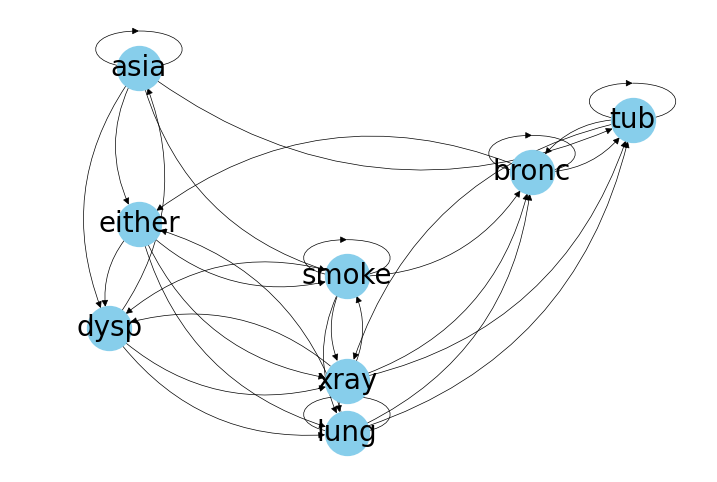

In [26]:
GA.plot_digraph(upper_triangular_matrix,np.array(data.columns))

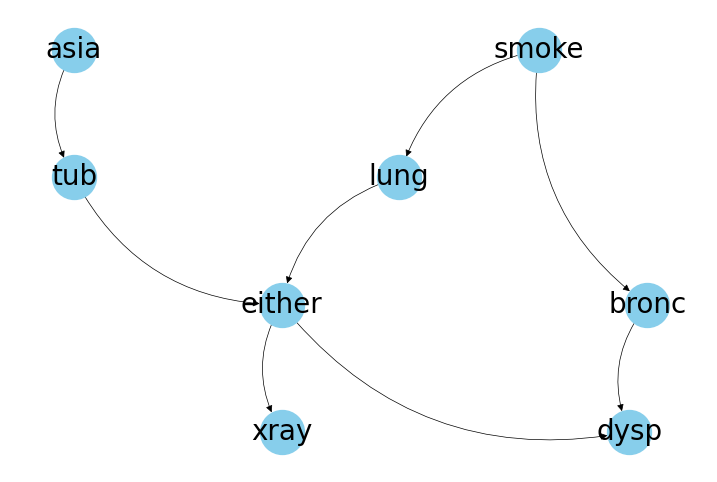

In [27]:
GA.plot_digraph(adjacency_matrix,np.array(data.columns))

In [28]:
upper_triangular_matrix[1][5]=1
upper_triangular_matrix[5][7]=1


In [29]:
#bayesian_network_individual.pandas_dataframe.columns

In [30]:
upper_triangular_matrix

array([[1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0]])

In [31]:



bayesian_network_individual = GA.BayesianNetworkIndividual(upper_triangular_matrix, data_sampled)




In [32]:

#upper_triangular_matrix=np.zeros([8,8])
#upper_triangular_matrix

In [33]:
#bayesian_network_individual.evaluate_cost()

In [34]:
bayesian_network_individual.adjacency_matrix

array([[0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [35]:
bayesian_network_individual.bit_representation


array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1., -1.])

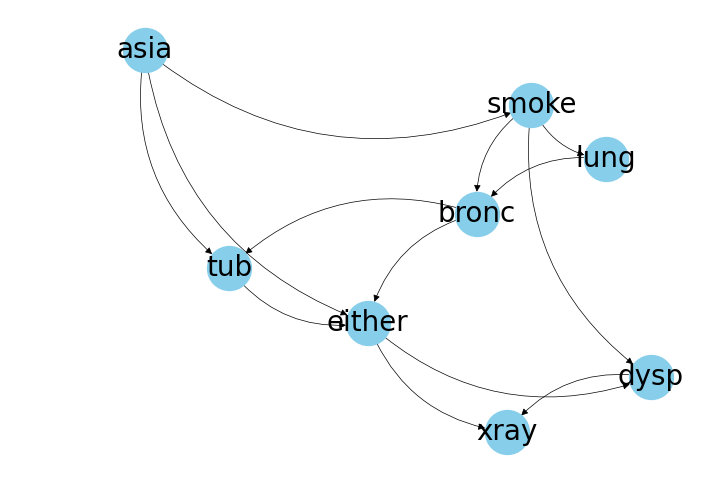

In [36]:
GA.plot_digraph(bayesian_network_individual.adjacency_matrix,np.array(data.columns))

In [37]:
teste=np.array(data.columns)

teste[5]

'either'

In [38]:
#feedback_arc_set = nx.feedback_arc_set(G)

In [39]:

edges = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2) ,(3,1),(3,0),(2,3)]
G = nx.DiGraph(edges)
test=(list(nx.simple_cycles(G)))

for edd in (list(nx.simple_cycles(G))):
    print(edd)



[0]
[2]
[0, 1, 2]
[0, 1, 2, 3]
[0, 2]
[0, 2, 3]
[1, 2]
[1, 2, 3]


In [40]:
#edges_to_remove = [(0, 1), (1, 2), (2, 0)]

In [41]:
G = nx.DiGraph(edges)
#test=(sorted(nx.simple_cycles(G)))
sorted_list = sorted(nx.simple_cycles(G), key=lambda x: len(x))
for edd in sorted_list:
    print(edd)

[0]
[2]
[0, 2]
[1, 2]
[0, 1, 2]
[0, 2, 3]
[1, 2, 3]
[0, 1, 2, 3]


In [42]:


#G.remove_edges_from(edges_to_remove)
G.remove_edge(1,2)


In [43]:
test=(list(nx.simple_cycles(G)))

for edd in (list(nx.simple_cycles(G))):
    print(edd)

[0]
[2]
[0, 2]
[0, 2, 3]


In [44]:
len_cycles=len(sorted(nx.simple_cycles(G)))
cycles=list(nx.simple_cycles(G))
k = np.random.randint(0, (len_cycles)) 
cycle = cycles[k]
len_cycle=cycle
print(len_cycle)
if len(len_cycle)<2:
    #G.remove_edge(cycle[0],cycle[0])
    print((cycle[0],cycle[0]))
    print('<2')
else:
    if len(len_cycle)==2:
        #G.remove_edge(cycle[0],cycle[1])
        print('=2')
        print(cycle[0],cycle[1])
        
    else:
        
        k = np.random.randint(0, len(len_cycle))
        #G.remove_edge(cycle[k],cycle[1])
        j=k
        while j == k:
            j = np.random.randint(0, len(len_cycle))
        print('>2')
        print(cycle[j],cycle[k])
        



[0, 2, 3]
>2
0 3


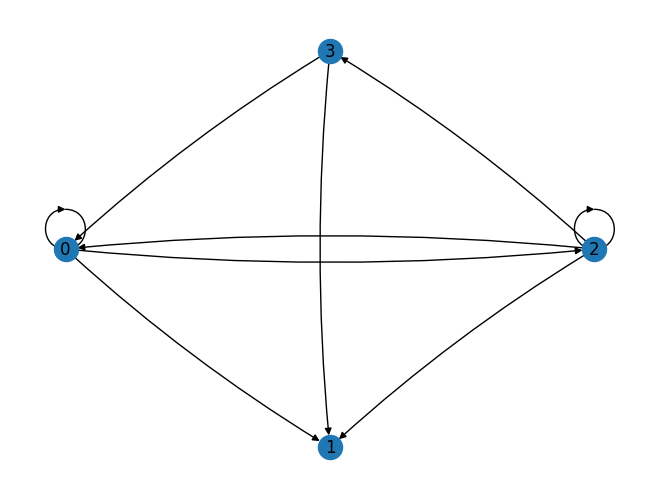

In [45]:
nx.draw(G,with_labels=True, pos=nx.shell_layout(G),connectionstyle='arc3,rad=0.05')

In [46]:
G.edges

OutEdgeView([(0, 0), (0, 1), (0, 2), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 0)])

In [47]:


# Create a sample matrix (Matrix A)
A = np.array([[2, 3, 4],
              [5, 6, 7],
              [8, 9, 10]])
B = np.ones_like(A) - np.eye(A.shape[0])

B

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [48]:

upper_triangular_matrix=GA.repair_dag(bayesian_network_individual).toarray()



#bayesian_network_individual = GA.BayesianNetworkIndividual(upper_triangular_matrix, data_sampled)



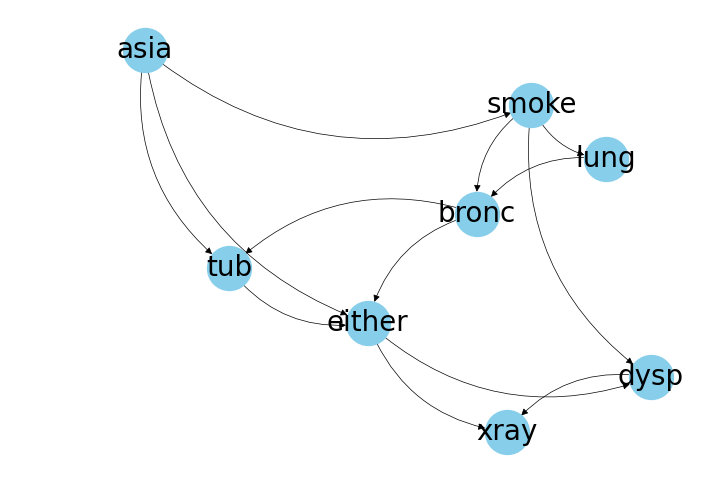

In [49]:
GA.plot_digraph(upper_triangular_matrix,np.array(data.columns))

In [50]:
GA.dag_to_bit(upper_triangular_matrix)

indi2=GA.BayesianNetworkIndividual.from_bit_representation(GA.dag_to_bit(upper_triangular_matrix),data_sampled,index)

In [51]:
indi2.evaluate_cost()

-13422.49346469879

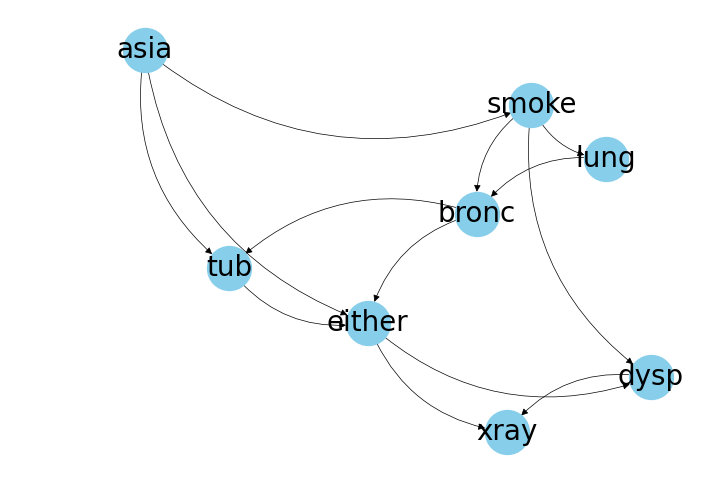

In [52]:
GA.plot_digraph(indi2.adjacency_matrix,np.array(data.columns))



In [53]:
AA=indi2.bit_representation
BB=bayesian_network_individual.bit_representation

# Assuming you have the arrays AA and BB defined
# You can replace these with your actual data

# Generate two random points in the array indices
point = np.random.permutation(len(AA))[:2]


point = np.sort(point)
print(point)

# Create aux1 and aux2 based on the points
aux1 = np.concatenate((AA[:point[0]], BB[point[0]:point[1]], AA[point[1]:]))
aux2 = np.concatenate((BB[:point[0]], AA[point[0]:point[1]], BB[point[1]:]))

# Assuming you have F1 and F2 defined
# You can replace these with your actual data
# Assuming k is the current iteration index

aux1
#aux2


[2 9]


array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1., -1.])

In [54]:
AA

array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1., -1.])

In [55]:
AA[point[1]:]

array([-1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  1., -1.])

In [56]:
prole1=indi2.crossover(bayesian_network_individual)

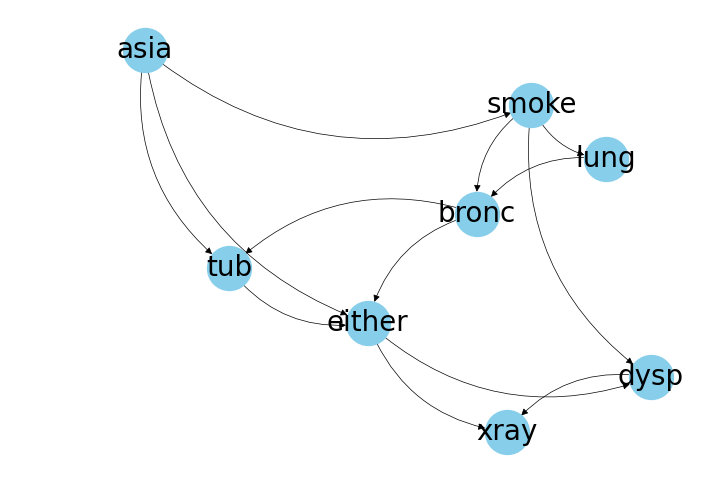

In [57]:
GA.plot_digraph(prole1[0].adjacency_matrix,np.array(data.columns))

In [58]:
aux=prole1[0].bit_representation

In [59]:
# Create a NumPy array
my_array = aux

# Define the number of elements to sample (n)
mu = np.random.choice(len(my_array), 1, replace=False)
if(mu>4):
    mu=4

# Use np.random.choice() to randomly select 'n' indices
sampled_indices = np.random.choice(len(my_array), mu, replace=False)

# Get the elements at the sampled indices
sampled_elements = my_array[sampled_indices]

# Print the sampled indices and elements
print("Sampled Indices:", sampled_indices)
print("Sampled Elements:", sampled_elements)





Sampled Indices: [ 1 25 26 13]
Sampled Elements: [1. 1. 1. 1.]


In [60]:
coin = np.random.random()
array = []  # Renamed 'set' to 'array'

if coin < 1/3:
    array = np.where(aux == 0)[0]
elif coin < 2/3:
    array = np.where(aux == 1)[0]
elif coin > 2/3:
    array = np.where(aux == -1)[0]
print(aux[array])

if np.random.random() > 0.01:
    if len(array) > 0:
        mu = np.random.randint(1, len(array))
        #print(mu)
    else:
        bit3 = [np.random.randint(0, len(aux[0]) - 1)]
    if(mu)>len(array)/4:
        mu=int(np.floor(len(array)/4))

    print(mu)
    if len(array) > mu:
        if coin < 1/3:
            if(mu>3):
                mu = 3
                print(coin < 1/3)
        bit3 = np.random.choice(array, size=mu, replace=False)
    else:
        bit3 = [np.random.randint(0, len(aux) - 1)]
        

else:
    if len(array) == 0:
        bit3 = [np.random.randint(0, len(aux) - 1)]
    else:
        bit3 = [np.random.choice(array)]
        
print(bit3)
print(mu)
for bit in bit3:
    if aux[bit] == 0:
        old = 0
        if np.random.random() > 0.5:
            aux[bit] = 1
        else:
            aux[bit] = -1
    elif aux[bit] == 1:
        old = 1
        if np.random.random() > 0.5:
            aux[bit] = 0
        else:
            aux[bit] = -1
    else:
        old = -1
        if np.random.random() > 0.5:
            aux[bit] = 0
        else:
            aux[bit] = 1

    # Converting aux to a DAG and checking if it's valid
    ajd_m = GA.bit_to_dag(aux, index)
    flag, dag = GA.is_dag(ajd_m)
    print(flag)
    if not flag:
        aux[bit] = old

# Continue with the rest of your code


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3
[6 7 2]
3
True
False
True


In [61]:
bit_new=np.zeros([28,])

prole1[0].bit_representation.shape
bit_new


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:

inditest=GA.BayesianNetworkIndividual.from_bit_representation(bit_new,data_sampled,index)


prole1=inditest

In [63]:
#prole1.bit_representation[bit3]

bit_1=np.array([])
bit_2=np.array([])
bit_0=np.array([])
max_interations=10000

In [64]:
for i in range(1,max_interations):
    bit_1=np.append(bit_1,np.sum(prole1.bit_representation==1))
    bit_2=np.append(bit_2,np.sum(prole1.bit_representation==-1))
    bit_0=np.append(bit_0,np.sum(prole1.bit_representation==0))
    #print(bit_1)
    prole1.mutate()

#print(prole1.bit_representation)

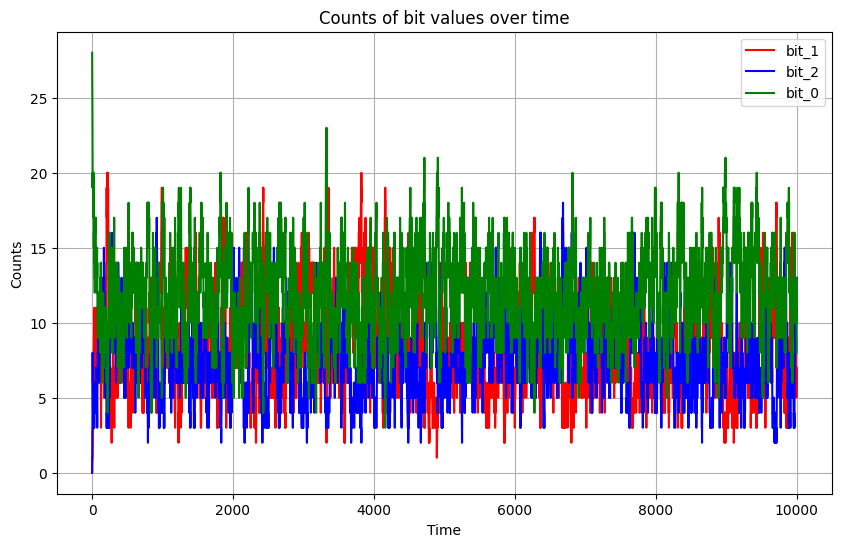

In [65]:
# Create a time array for the x-axis
time = np.arange(1, max_interations)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, bit_1, label='bit_1', color='red')
plt.plot(time, bit_2, label='bit_2', color='blue')
plt.plot(time, bit_0, label='bit_0', color='green')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()

# Show the plot
plt.title('Counts of bit values over time')
plt.grid(True)
plt.show()

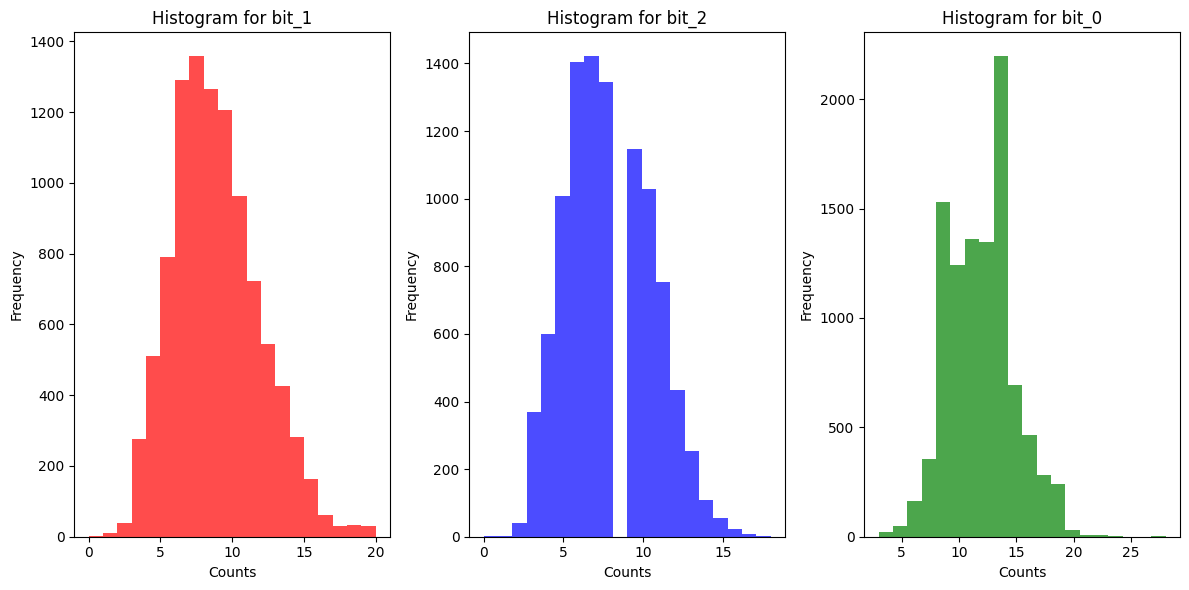

In [66]:
# Create subplots for histograms
plt.figure(figsize=(12, 6))

# Histogram for bit_1
plt.subplot(1, 3, 1)
plt.hist(bit_1, bins=20, color='red', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_1')

# Histogram for bit_2
plt.subplot(1, 3, 2)
plt.hist(bit_2, bins=20, color='blue', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_2')

# Histogram for bit_0
plt.subplot(1, 3, 3)
plt.hist(bit_0, bins=20, color='green', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_0')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [67]:
#prole1.bit_representation[bit3]

bit_1=np.array([])
bit_2=np.array([])
bit_0=np.array([])
inditest=GA.BayesianNetworkIndividual.from_bit_representation(bit_new,data_sampled,index)
prole1=inditest

In [68]:
for i in range(1,max_interations):
    bit_1=np.append(bit_1,np.sum(prole1.bit_representation==1))
    bit_2=np.append(bit_2,np.sum(prole1.bit_representation==-1))
    bit_0=np.append(bit_0,np.sum(prole1.bit_representation==0))
    #print(bit_1)
    prole1.mutate2()

#print(prole1.bit_representation)

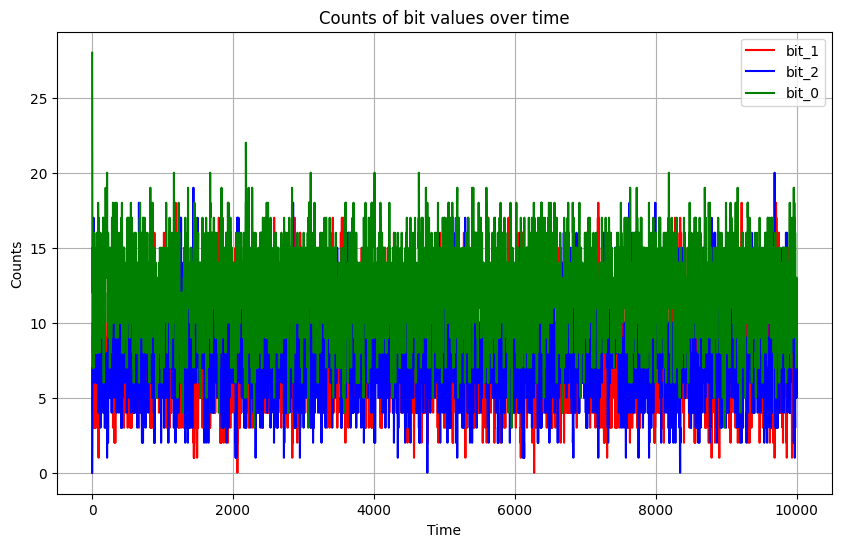

In [69]:
# Create a time array for the x-axis
time = np.arange(1, max_interations)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, bit_1, label='bit_1', color='red')
plt.plot(time, bit_2, label='bit_2', color='blue')
plt.plot(time, bit_0, label='bit_0', color='green')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()

# Show the plot
plt.title('Counts of bit values over time')
plt.grid(True)
plt.show()

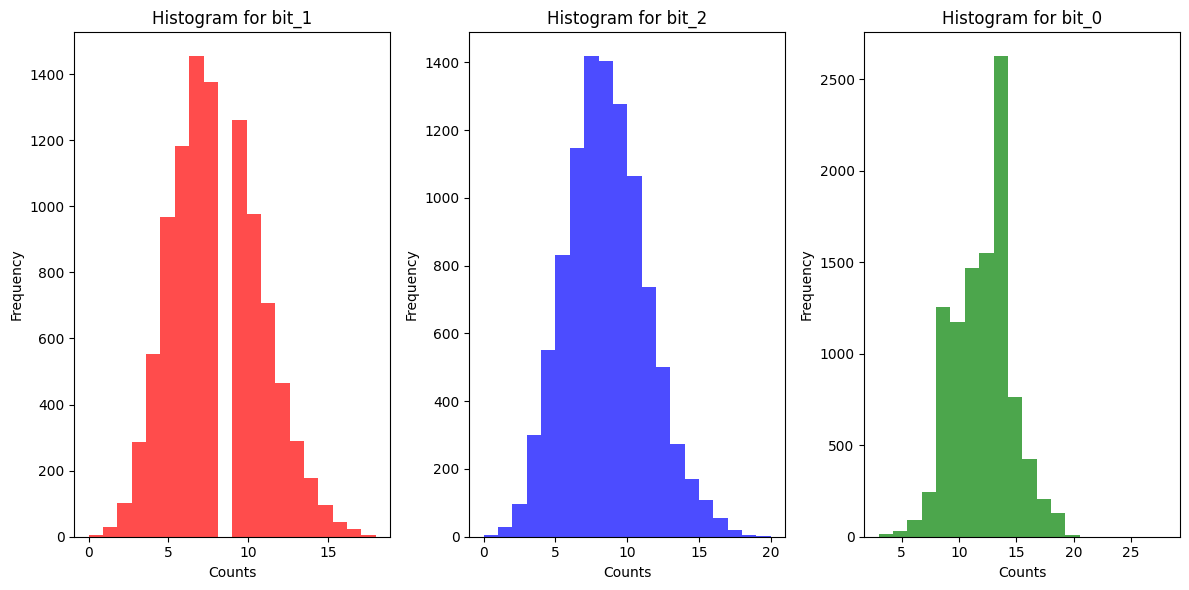

In [70]:
# Create subplots for histograms
plt.figure(figsize=(12, 6))

# Histogram for bit_1
plt.subplot(1, 3, 1)
plt.hist(bit_1, bins=20, color='red', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_1')

# Histogram for bit_2
plt.subplot(1, 3, 2)
plt.hist(bit_2, bins=20, color='blue', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_2')

# Histogram for bit_0
plt.subplot(1, 3, 3)
plt.hist(bit_0, bins=20, color='green', alpha=0.7)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram for bit_0')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [71]:

vector_length = 28
# Define the probabilities
probabilities = [1/vector_length, (vector_length-2)/vector_length, 1/vector_length]

# Define the length of the vector


# Create the vector using random.choices with specified probabilities
vector = np.random.choice([-1, 0, 1], size=vector_length, p=probabilities)

# Print the generated vector
print(vector)


[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0]


In [72]:
#obj=GA.BayesianNetworkIndividual.from_bit_representation(vector,data_sampled,index=index)

matrix=GA.bit_to_dag(vector,index)

#GA.BayesianNetworkIndividual(matrix,data_sampled)
print(matrix.shape)

flag,digraph_nx=GA.is_dag(matrix)

(8, 8)


In [76]:
def tournoment( obj1, obj2):
    if(obj1.cost>obj2.cost):
        return 1
    else:
        return 0

In [ ]:
#def otimizador_func(obj)

In [77]:
Pop_size = np.array(range(100))

In [106]:
#Creating initial population

object_list = []
for i in range(100):
    vector = np.random.choice([-1, 0, 1], size=vector_length, p=probabilities)
    obj=GA.BayesianNetworkIndividual.from_bit_representation(vector,data_sampled,index=index)
    cost=obj.evaluate_cost()
    object_list.append(obj)
    
sorted_people = sorted(object_list, key=lambda obj:obj.cost,reverse = True)

In [107]:

### GA body
best_fit=[]
max_interations=2000
pc=0.5
pm=0.5
for j in range(max_interations):
    # parents selection
    parents=[]
    for i in range(4):
        selected_torneio=np.random.choice(Pop_size, size=2, replace=False)
        # Access the selected individuals from the sorted_people list
        selected_individuals = [sorted_people[index] for index in selected_torneio]
        #selected_individuals
        result = tournoment(selected_individuals[0], selected_individuals[1])
        parents.append(selected_individuals[result])

    # Crossover
    filhos=[]
    for i in  range(0, 4, 2):
        if(pc>np.random.rand()):
            f1,f2 =parents[i].crossover(parents[i+1])
            filhos.extend([f1,f2])
        else:
            filhos.extend([parents[i],parents[i+1]])

    # Mutation & cost evaluation
    for i in range(4):
        if(pm>np.random.rand()):
            filhos[i].mutate()
        filhos[i].evaluate_cost()

    # Sorting acording to cost function 
    sorted_people.extend(filhos)
    sorted_people = sorted(sorted_people, key=lambda obj:obj.cost,reverse = True)

    for _ in range(4):
        sorted_people.pop()

    best_fit.append(sorted_people[0].cost)

    


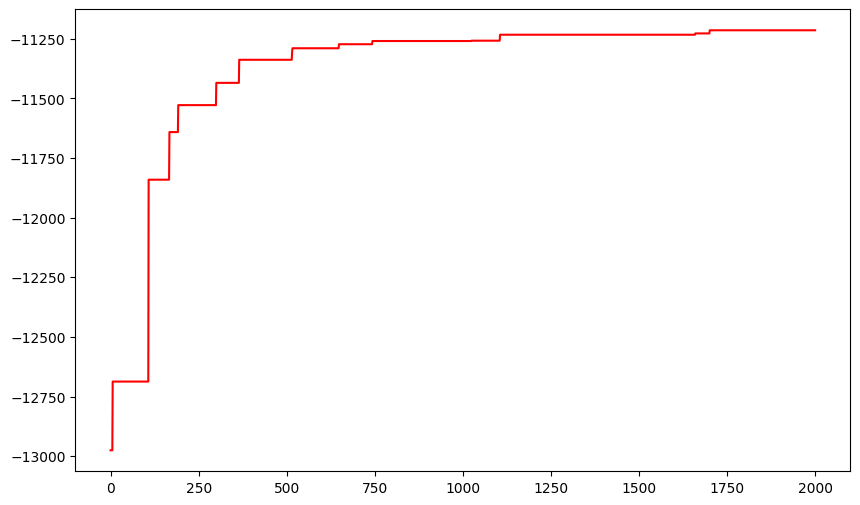

In [108]:
# Create a time array for the x-axis
interacoes = np.arange(0, max_interations)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(interacoes, best_fit, label='best_fit', color='red')

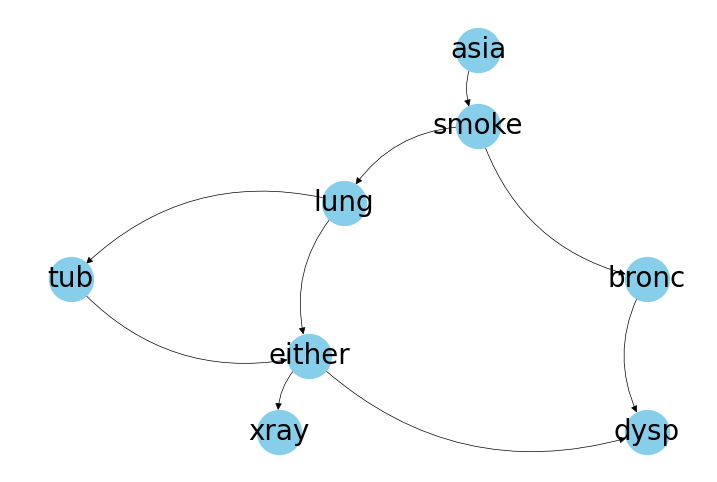

In [109]:
GA.plot_digraph(sorted_people[0].adjacency_matrix,data_sampled.columns)



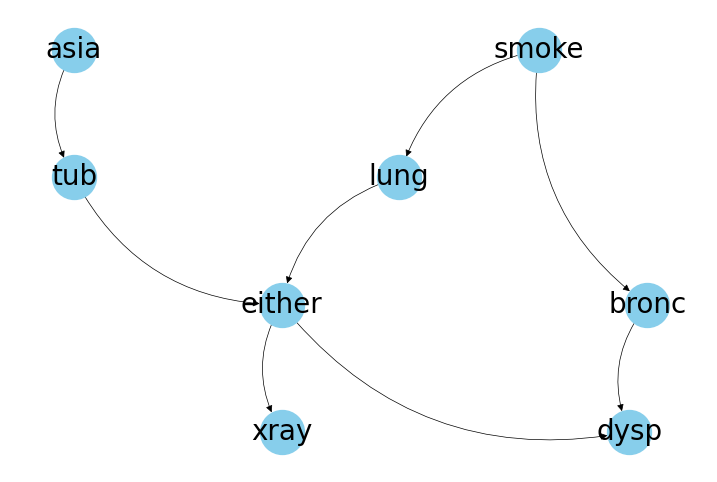

In [97]:
GA.plot_digraph(adjacency_matrix,data_sampled.columns)